In [54]:
import anndata
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams

In [55]:
# load batch integrated data
adata = anndata.read_h5ad("batch_integrated.h5ad")
adata.obs.head()

n_genes  n_genes_by_counts  total_counts  \
AAACCCAAGATGGCGT-1-townsend_JLE48_3     4372               4372       12266.0   
AAACCCAAGCAGATAT-1-townsend_JLE48_3     1190               1190        1412.0   
AAACCCACACGCTATA-1-townsend_JLE48_3      485                485         602.0   
AAACCCACATTGAGGG-1-townsend_JLE48_3     4772               4771       15803.0   
AAACCCAGTCTTTCAT-1-townsend_JLE48_3      586                586         745.0   

                                     total_counts_mt  pct_counts_mt leiden  \
AAACCCAAGATGGCGT-1-townsend_JLE48_3            107.0       0.872330     15   
AAACCCAAGCAGATAT-1-townsend_JLE48_3             15.0       1.062323      2   
AAACCCACACGCTATA-1-townsend_JLE48_3             41.0       6.810631      2   
AAACCCACATTGAGGG-1-townsend_JLE48_3             36.0       0.227805      3   
AAACCCAGTCTTTCAT-1-townsend_JLE48_3             33.0       4.429530      1   

                                    cell_type_detail   dataset  \
AAACCCAAGATGGCGT-1-townsend_JLE48_3             OD-L  townsend   
AAACCCAAGCAGATAT-1-townsend_JLE48_3             ExN2  townsend   
AAACCCACACGCTATA-1-townsend_JLE48_3           ExN-L1  townsend   
AAACCCACATTGAGGG-1-townsend_JLE48_3              OPC  townsend   
AAACCCAGTCTTTCAT-1-townsend_JLE48_3               MG  townsend   

                                                batch  
AAACCCAAGATGGCGT-1-townsend_JLE48_3  townsend_JLE48_3  
AAACCCAAGCAGATAT-1-townsend_JLE48_3  townsend_JLE48_3  
AAACCCACACGCTATA-1-townsend_JLE48_3  townsend_JLE48_3  
AAACCCACATTGAGGG-1-townsend_JLE48_3  townsend_JLE48_3  
AAACCCAGTCTTTCAT-1-townsend_JLE48_3  townsend_JLE48_3

In [89]:
# define function to add condition column info per sample
def condition(row):
    if row['batch'] == 'townsend_JLE48_3':
        return 'FCD Type II'
    elif row['batch'] == 'townsend_JLE49_3':
        return 'FCD Type I'
    elif row['batch'] == 'townsend_JLE50_3':
        return 'FCD Type III'
    elif row['batch'] == 'westfall_JLE18':
        return 'FCD Type I'
    elif row['batch'] == 'westfall_JLE33':
        return 'FCD Type I'
    else:
        return 'Control'

In [158]:
adata.obs['condition'] = adata.obs.apply(lambda row: condition(row), axis=1)
adata.obs.head()

n_genes  n_genes_by_counts  total_counts  \
AAACCCAAGATGGCGT-1-townsend_JLE48_3     4372               4372       12266.0   
AAACCCAAGCAGATAT-1-townsend_JLE48_3     1190               1190        1412.0   
AAACCCACACGCTATA-1-townsend_JLE48_3      485                485         602.0   
AAACCCACATTGAGGG-1-townsend_JLE48_3     4772               4771       15803.0   
AAACCCAGTCTTTCAT-1-townsend_JLE48_3      586                586         745.0   

                                     total_counts_mt  pct_counts_mt leiden  \
AAACCCAAGATGGCGT-1-townsend_JLE48_3            107.0       0.872330     15   
AAACCCAAGCAGATAT-1-townsend_JLE48_3             15.0       1.062323      2   
AAACCCACACGCTATA-1-townsend_JLE48_3             41.0       6.810631      2   
AAACCCACATTGAGGG-1-townsend_JLE48_3             36.0       0.227805      3   
AAACCCAGTCTTTCAT-1-townsend_JLE48_3             33.0       4.429530      1   

                                    cell_type_detail   dataset  \
AAACCCAAGATGGCGT-1-townsend_JLE48_3             OD-L  townsend   
AAACCCAAGCAGATAT-1-townsend_JLE48_3             ExN2  townsend   
AAACCCACACGCTATA-1-townsend_JLE48_3           ExN-L1  townsend   
AAACCCACATTGAGGG-1-townsend_JLE48_3              OPC  townsend   
AAACCCAGTCTTTCAT-1-townsend_JLE48_3               MG  townsend   

                                                batch    condition  
AAACCCAAGATGGCGT-1-townsend_JLE48_3  townsend_JLE48_3  FCD Type II  
AAACCCAAGCAGATAT-1-townsend_JLE48_3  townsend_JLE48_3  FCD Type II  
AAACCCACACGCTATA-1-townsend_JLE48_3  townsend_JLE48_3  FCD Type II  
AAACCCACATTGAGGG-1-townsend_JLE48_3  townsend_JLE48_3  FCD Type II  
AAACCCAGTCTTTCAT-1-townsend_JLE48_3  townsend_JLE48_3  FCD Type II

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


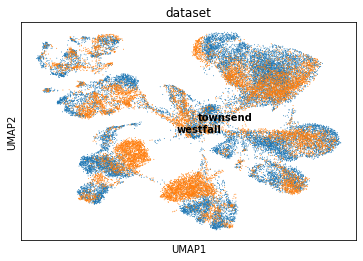

In [159]:
sc.pl.umap(adata, color=["dataset"], legend_loc = 'on data', show=True)

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


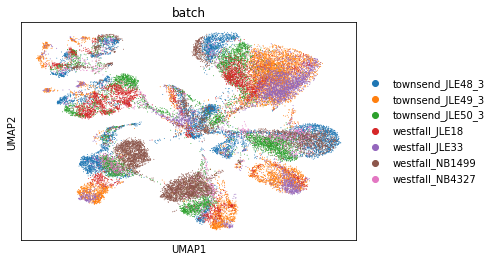

In [177]:
sc.pl.umap(adata, color=["batch"], show=True)

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


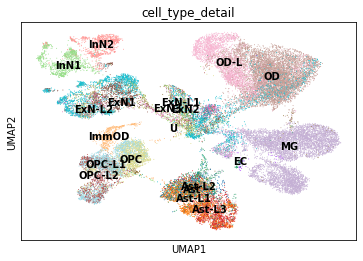

In [35]:
sc.pl.umap(adata, color=["cell_type_detail"], legend_loc = 'on data', show=True)

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


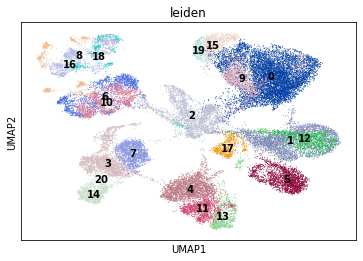

In [56]:
sc.pl.umap(adata, color=["leiden"], legend_loc = 'on data', show=True)

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


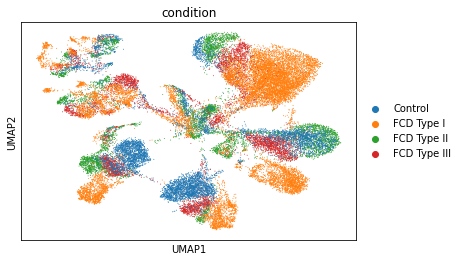

In [93]:
sc.pl.umap(adata, color=["condition"], show=True)

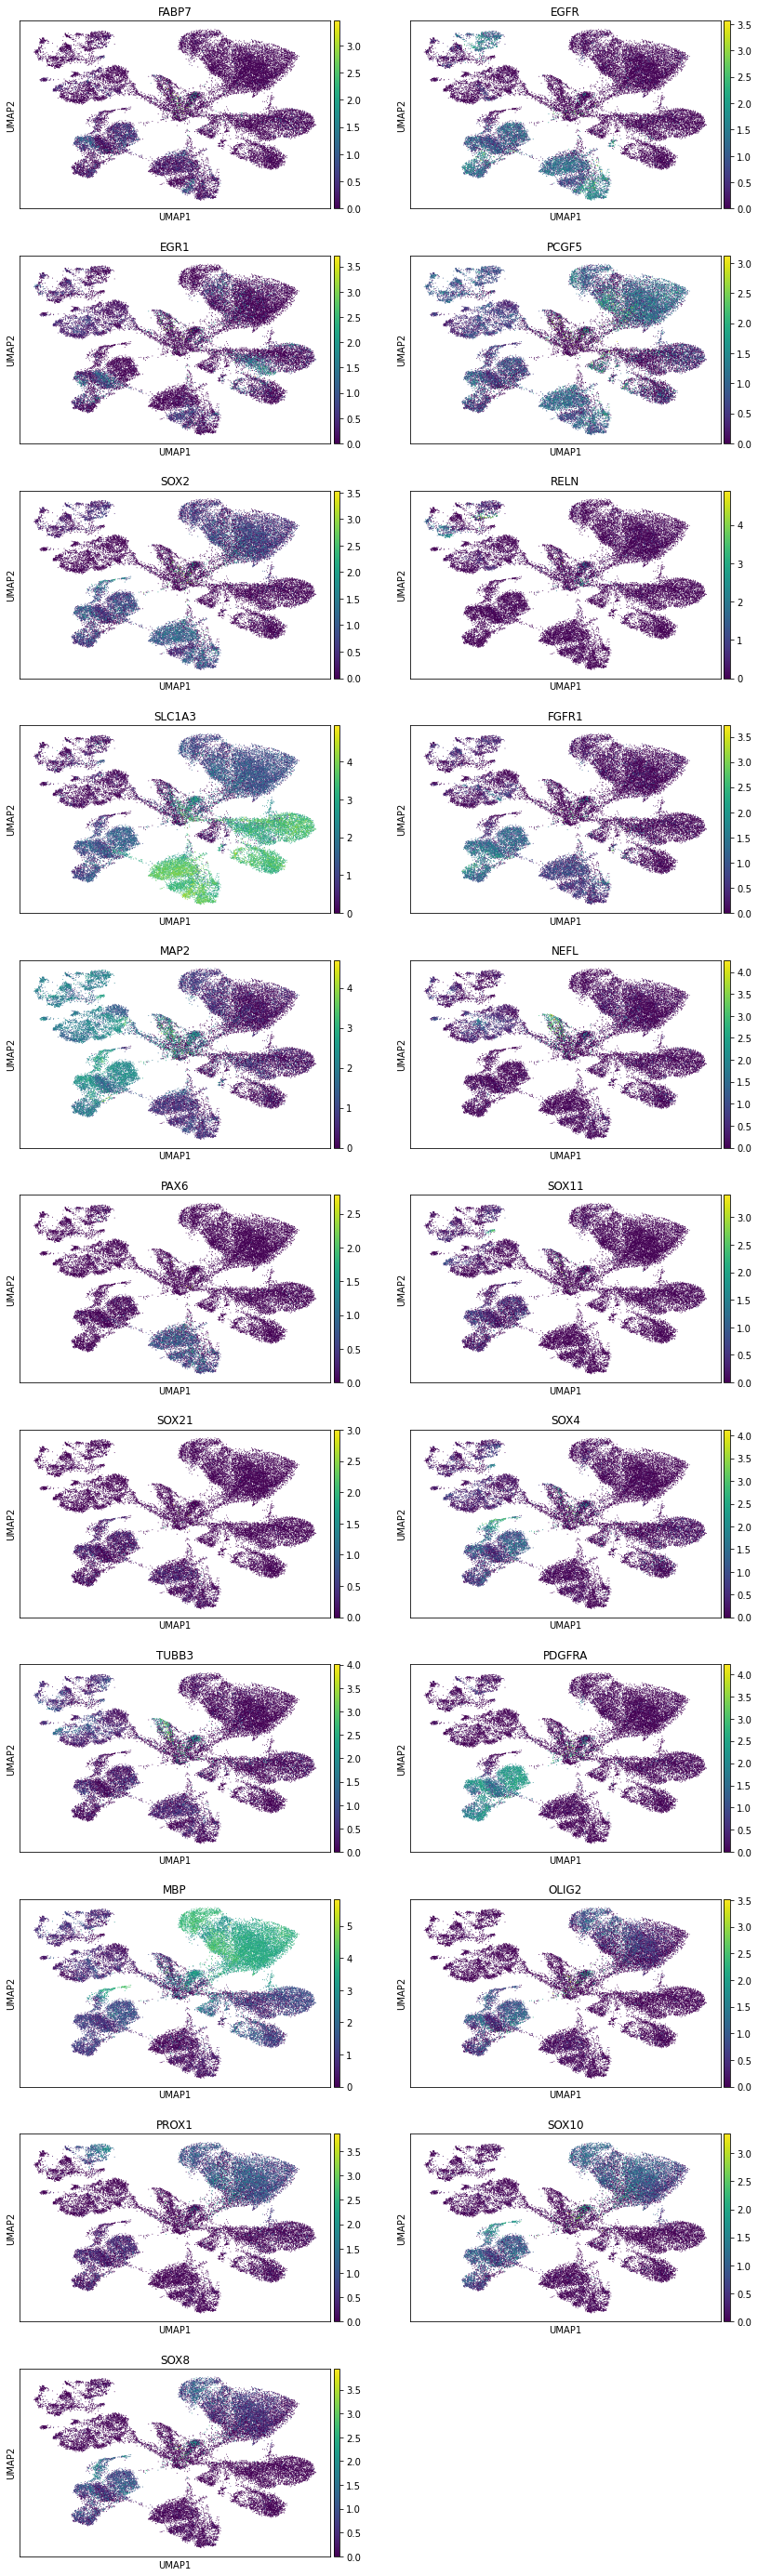

In [95]:
# plot stemness marker genes
stem_markers = ['FABP7', 'EGFR', 'EGR1', 'PCGF5', 'SOX2',
                 'RELN', 'SLC1A3', 'FGFR1', 'MAP2',
                 'NEFL', 'PAX6', 'SOX11', 'SOX21', 'SOX4',
                 'TUBB3', 'PDGFRA', 'MBP', 'OLIG2', 'PROX1', 'SOX10', 'SOX8']

sc.pl.umap(adata, color=stem_markers, use_raw=True,
                sort_order=True, ncols=2)

In [96]:
# subset adata to only oligodendrocytes cell type cluster
OD = adata[adata.obs["leiden"].isin(['9', '0', '19', '15']),:]

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


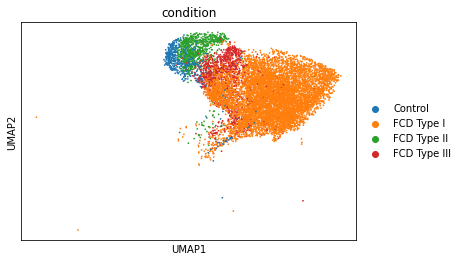

In [97]:
sc.pl.umap(OD, color=["condition"], show=True)

In [98]:
# identify variable genes
sc.pp.highly_variable_genes(OD)

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:208: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


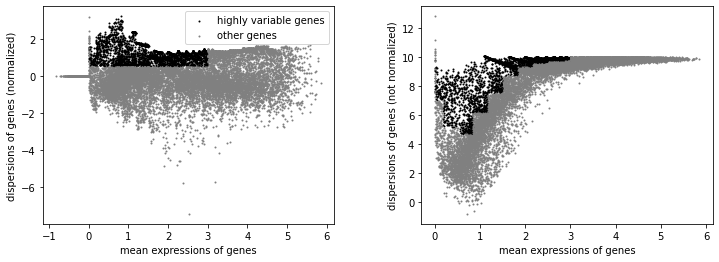

In [68]:
# plot variablility distribution
sc.pl.highly_variable_genes(OD)

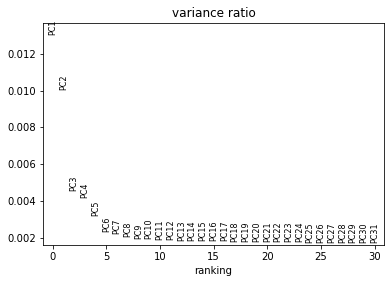

In [99]:
# PCA
sc.tl.pca(OD)
sc.pl.pca_variance_ratio(OD, n_pcs=30)

In [100]:
# computing the neighborhood graph and find clusters
sc.pp.neighbors(OD, n_pcs=15)
sc.tl.leiden(OD, resolution=0.4)

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


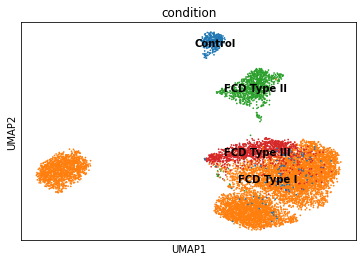

In [102]:
# run and plot UMAP
sc.tl.umap(OD)
fig = sc.pl.umap(OD, color=['condition'],
                legend_fontsize = 10,
                legend_loc = 'on data')

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


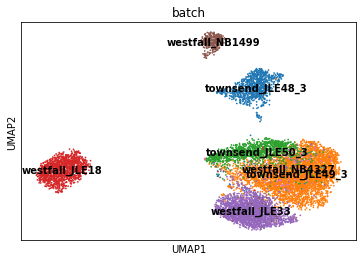

In [104]:
sc.tl.umap(OD)
fig = sc.pl.umap(OD, color=['batch'],
                legend_fontsize = 10,
                legend_loc = 'on data')

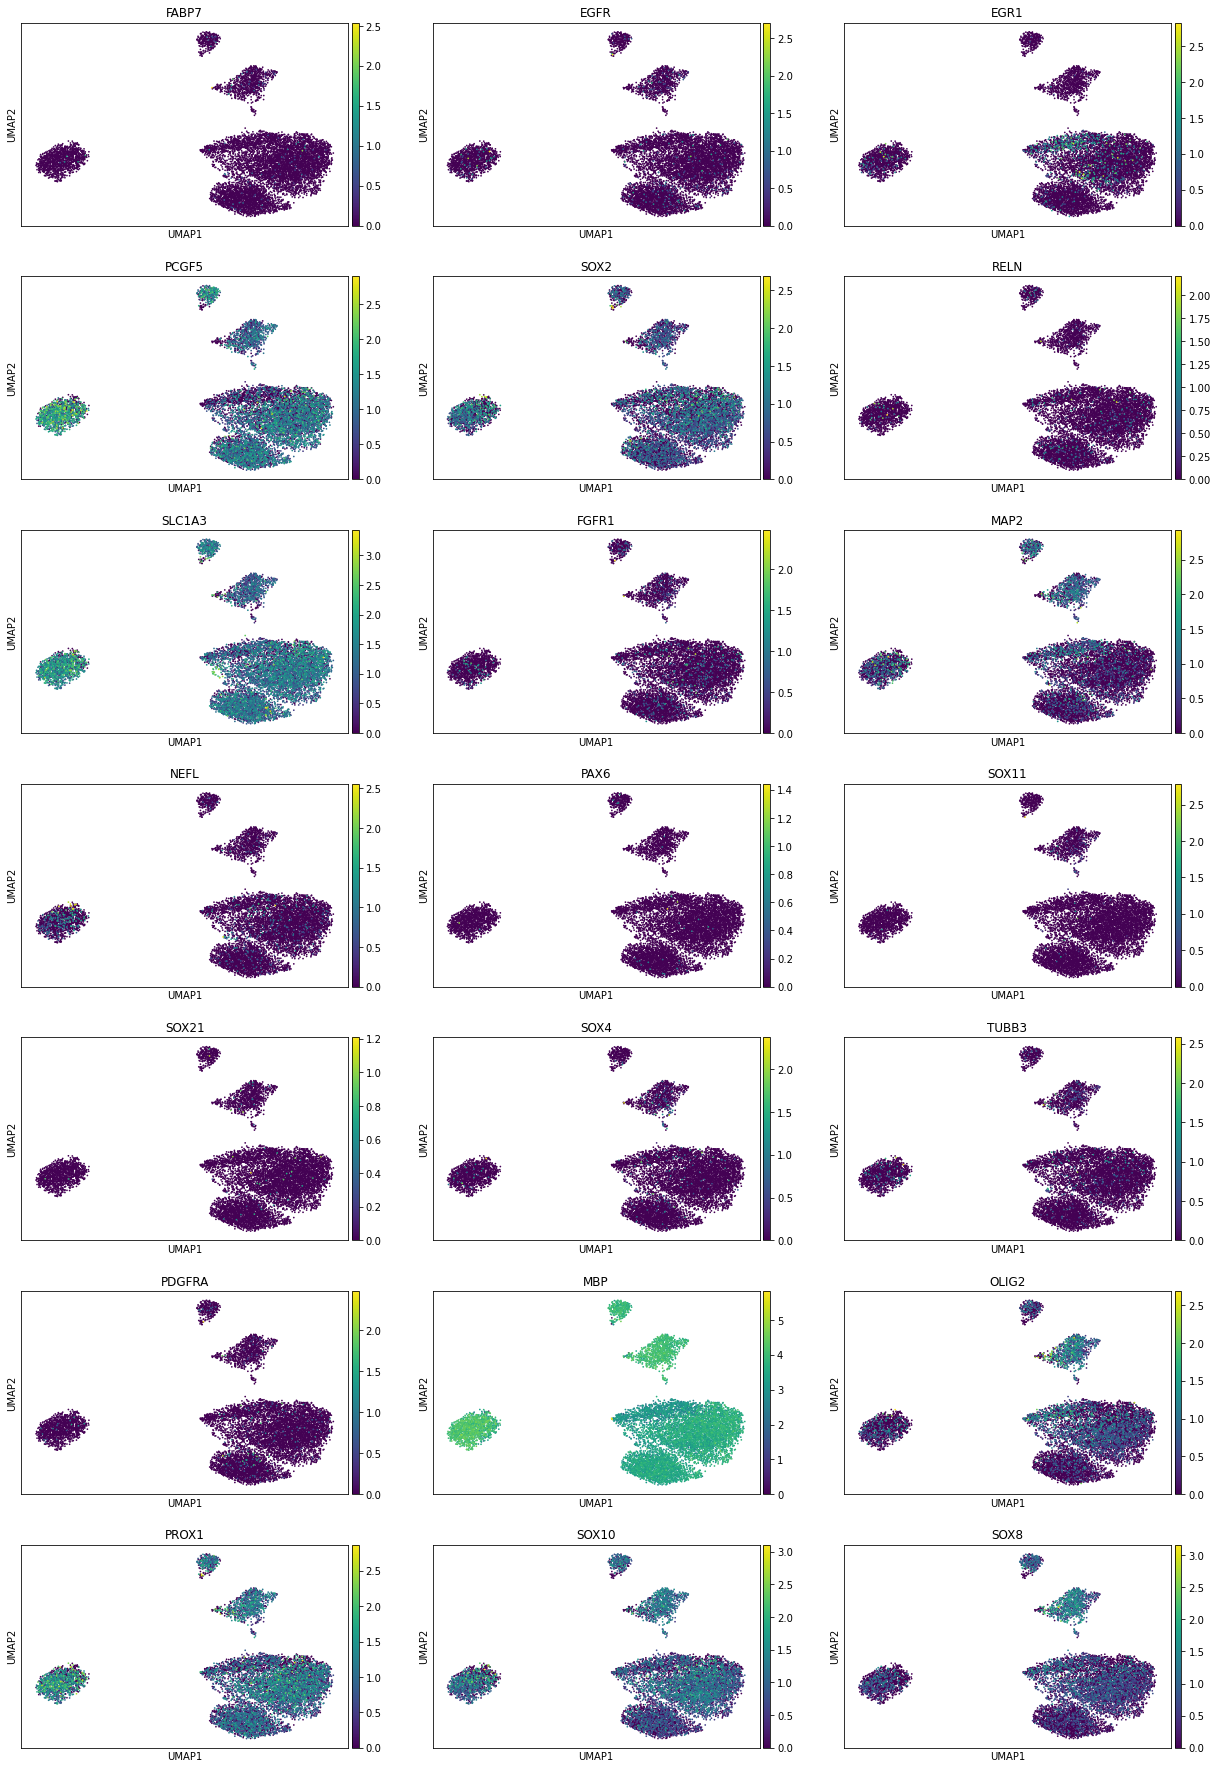

In [132]:
# plot stemness markers within OD
#stem_markers_OD = ['EGR1', 'PCGF5', 'SOX2', 'SLC1A3', 'MAP2',
                 #'NEFL','OLIG2', 'PROX1', 'SOX10', 'SOX8']
sc.pl.umap(OD, color=stem_markers, use_raw=True, sort_order=True, ncols=3)

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


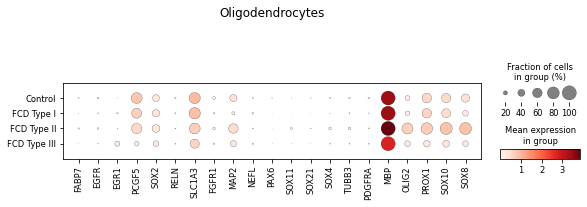

In [133]:
dotplot_OD = sc.pl.dotplot(OD, stem_markers, groupby='condition', title='Oligodendrocytes', save='OD_stemmarkers.png')

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


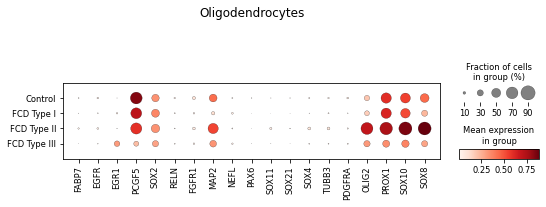

In [140]:
# remove MBP, SLC1A3 to see finer expression differences
stem_markers_OD = ['FABP7', 'EGFR', 'EGR1', 'PCGF5', 'SOX2',
                 'RELN', 'FGFR1', 'MAP2',
                 'NEFL', 'PAX6', 'SOX11', 'SOX21', 'SOX4',
                 'TUBB3', 'PDGFRA', 'OLIG2', 'PROX1', 'SOX10', 'SOX8']
dotplot_OD = sc.pl.dotplot(OD, stem_markers_OD, groupby='condition', title='Oligodendrocytes', save='OD_stemmarkers2.png')

In [ ]:
#  Type II FCDs express nestin, a neuroglial progenitor protein that is modulated 
# in vitro by stem cell proteins following activation of mTORC1. 
# Since mTORC1 activation has been demonstrated in type II FCDs, 
# we hypothesized that stemness marker expression would distinguish type II from type I FCDs.
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3474261/

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


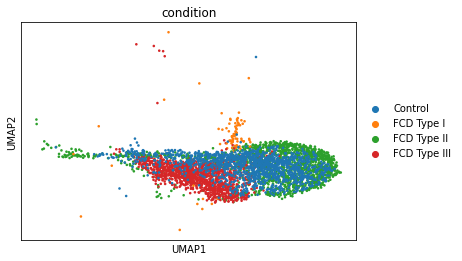

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:208: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


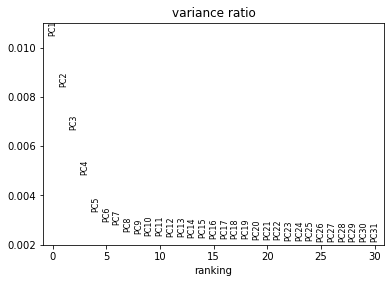

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


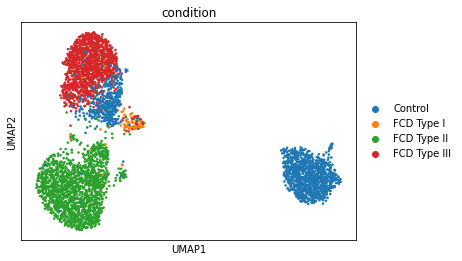

In [111]:
# subset adata to only microglia cell type cluster, repeat analysis
MG = adata[adata.obs["leiden"].isin(['1', '12']),:]
sc.pl.umap(MG, color=["condition"], show=True)
# identify variable genes
sc.pp.highly_variable_genes(MG)
# PCA
sc.tl.pca(MG)
sc.pl.pca_variance_ratio(MG, n_pcs=30)
# computing the neighborhood graph and find clusters
sc.pp.neighbors(MG, n_pcs=15)
sc.tl.leiden(MG, resolution=0.4)
# run and plot UMAP
sc.tl.umap(MG)
fig = sc.pl.umap(MG, color=['condition'],
                legend_fontsize = 10)

In [ ]:
# FCD type 1 has a lot less microglia

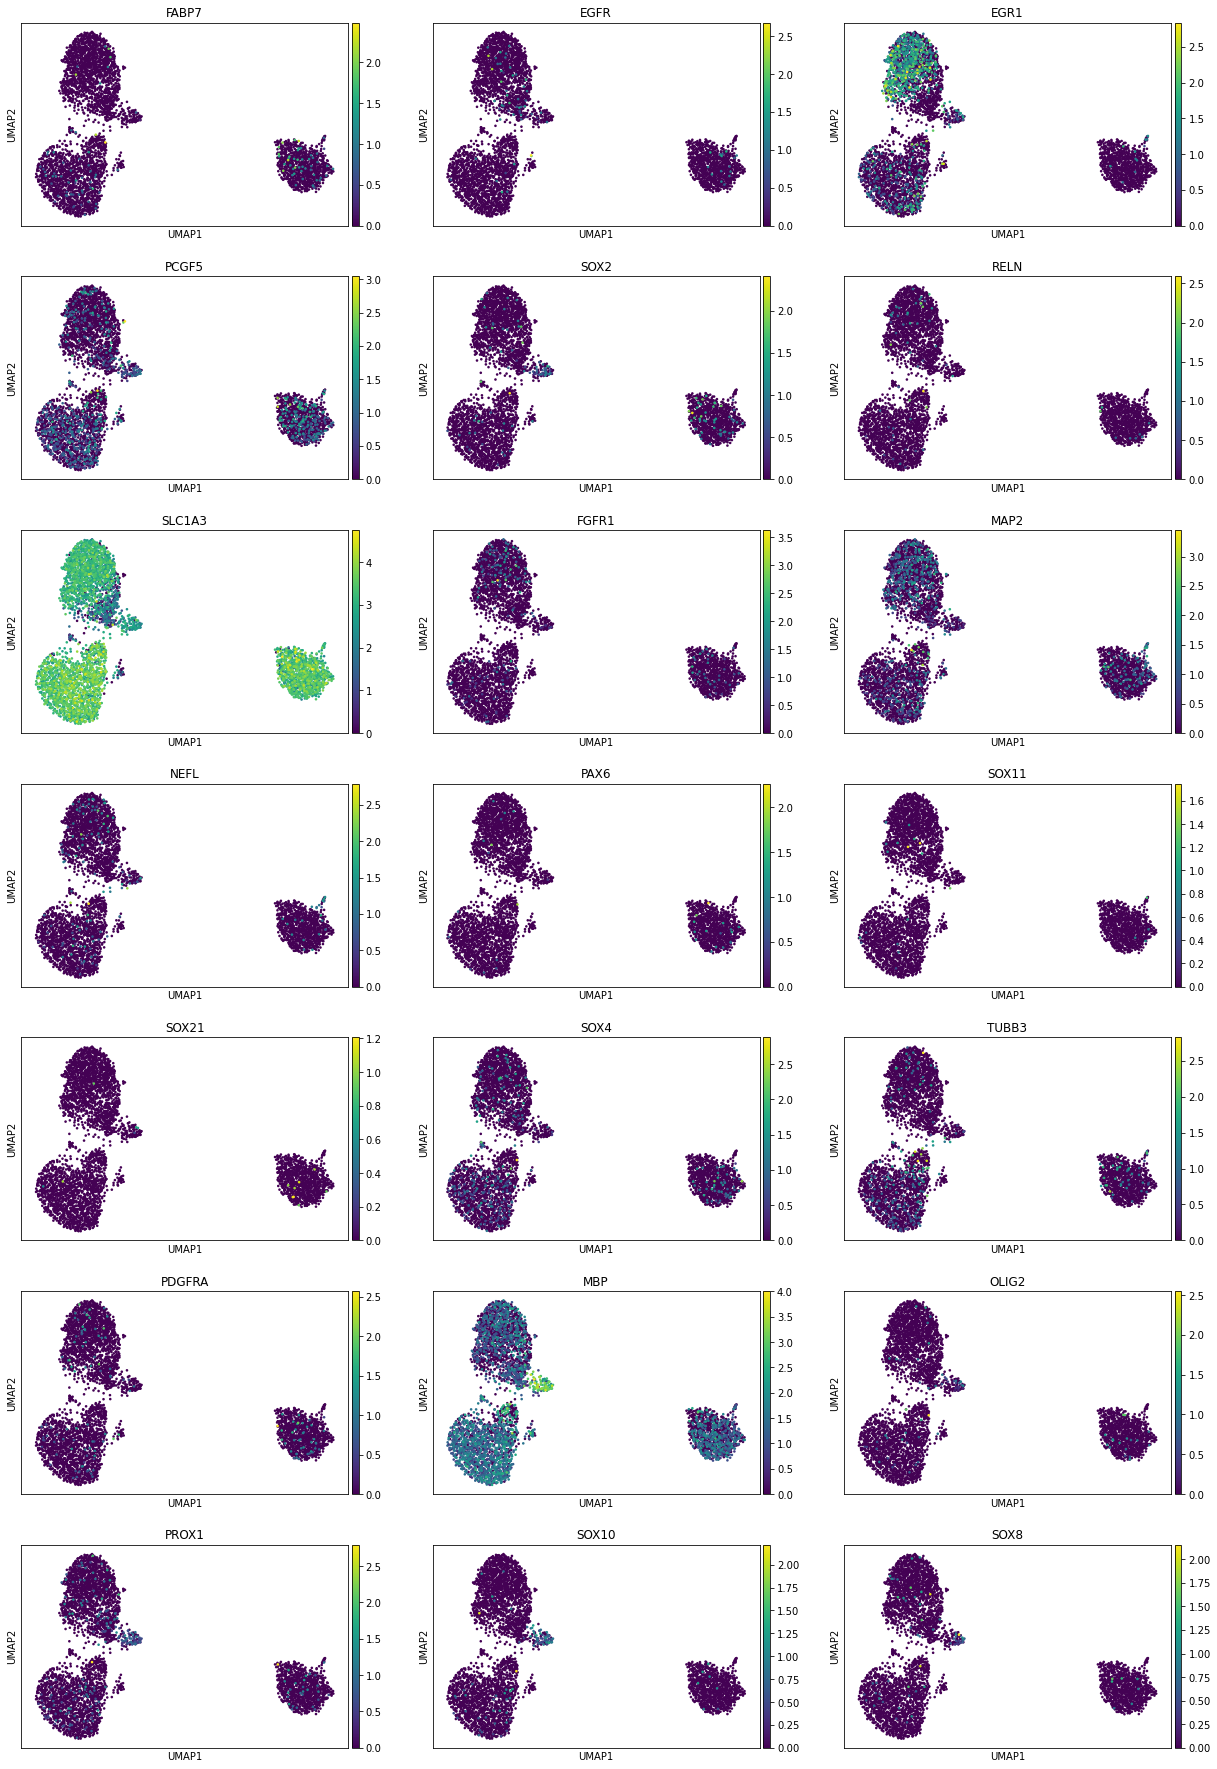

In [126]:
# plot stemness markers within MG
sc.pl.umap(MG, color=stem_markers, use_raw=True,
                sort_order=True, ncols=3)

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


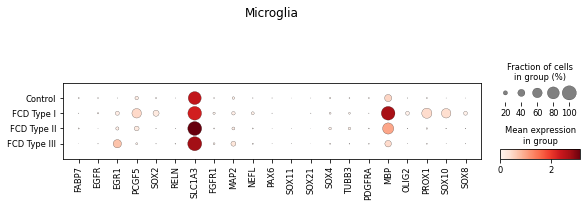

In [134]:
dotplot_MG = sc.pl.dotplot(MG, stem_markers, groupby='condition', title='Microglia', save='MG_stemmarkers.png')

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


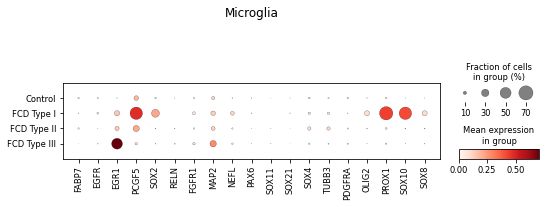

In [143]:
# remove MBP, SLC1A3 to see finer expression differences
stem_markers_MG = ['FABP7', 'EGFR', 'EGR1', 'PCGF5', 'SOX2',
                 'RELN', 'FGFR1', 'MAP2',
                 'NEFL', 'PAX6', 'SOX11', 'SOX21', 'SOX4',
                 'TUBB3', 'PDGFRA', 'OLIG2', 'PROX1', 'SOX10', 'SOX8']
dotplot_MG = sc.pl.dotplot(MG, stem_markers_MG, groupby='condition', title='Microglia', save='MG_stemmarkers2.png')

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


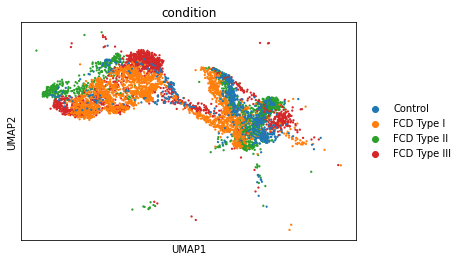

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:208: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


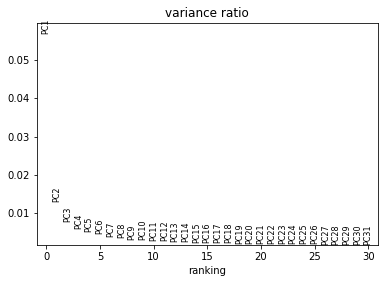

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


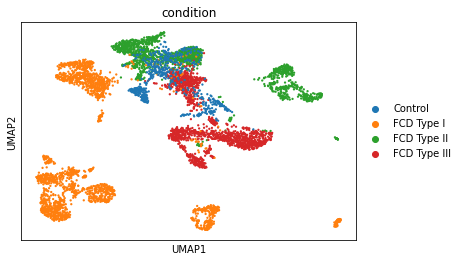

In [120]:
# Ex-N, repeat analysis
ExN = adata[adata.obs["leiden"].isin(['6', '10', '2']),:]
sc.pl.umap(ExN, color=["condition"], show=True)
# identify variable genes
sc.pp.highly_variable_genes(ExN)
# PCA
sc.tl.pca(ExN)
sc.pl.pca_variance_ratio(ExN, n_pcs=30)

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


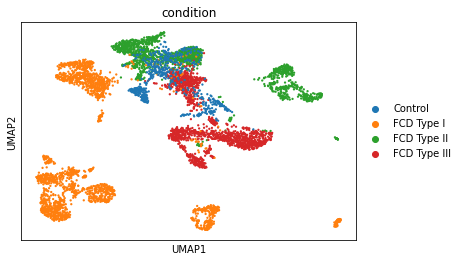

In [123]:
# computing the neighborhood graph and find clusters
sc.pp.neighbors(ExN, n_pcs=15)
sc.tl.leiden(ExN, resolution=0.4)
# run and plot UMAP
sc.tl.umap(ExN)
fig = sc.pl.umap(ExN, color=['condition'],
                legend_fontsize = 10)

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


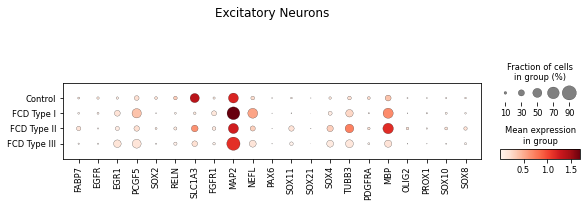

In [138]:
dotplot_ExN = sc.pl.dotplot(ExN, stem_markers, groupby='condition', title='Excitatory Neurons', save='ExN_stemmarkers.png')

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


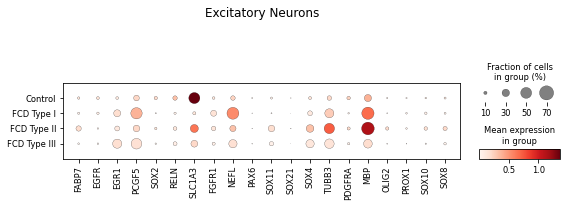

In [146]:
# remove MAP2
stem_markers_ExN = ['FABP7', 'EGFR', 'EGR1', 'PCGF5', 'SOX2',
                 'RELN', 'SLC1A3', 'FGFR1',
                 'NEFL', 'PAX6', 'SOX11', 'SOX21', 'SOX4',
                 'TUBB3', 'PDGFRA', 'MBP', 'OLIG2', 'PROX1', 'SOX10', 'SOX8']
dotplot_ExN = sc.pl.dotplot(ExN, stem_markers_ExN, groupby='condition', title='Excitatory Neurons', save='ExN_stemmarkers2.png')

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


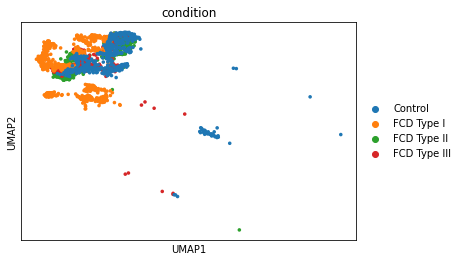

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:208: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


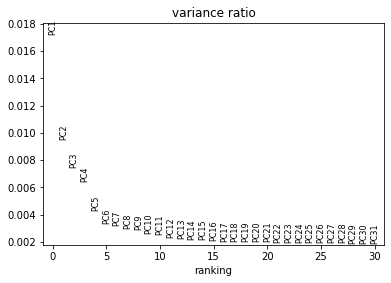

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


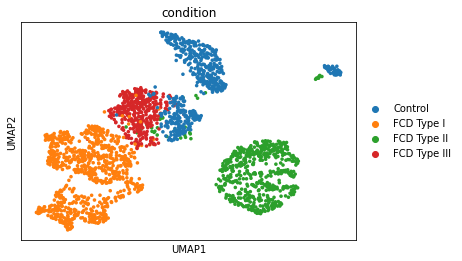

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


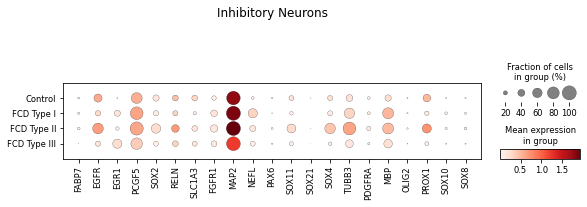

In [136]:
# InN, repeat analysis
InN = adata[adata.obs["leiden"].isin(['8', '16', '18']),:]
sc.pl.umap(InN, color=["condition"], show=True)
# identify variable genes
sc.pp.highly_variable_genes(InN)
# PCA
sc.tl.pca(InN)
sc.pl.pca_variance_ratio(InN, n_pcs=30)
# computing the neighborhood graph and find clusters
sc.pp.neighbors(InN, n_pcs=15)
sc.tl.leiden(InN, resolution=0.4)
# run and plot UMAP
sc.tl.umap(InN)
fig = sc.pl.umap(InN, color=['condition'],
                legend_fontsize = 10)
# make dot plot
dotplot_InN = sc.pl.dotplot(InN, stem_markers, groupby='condition', title='Inhibitory Neurons', save='InN_stemmarkers.png')

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


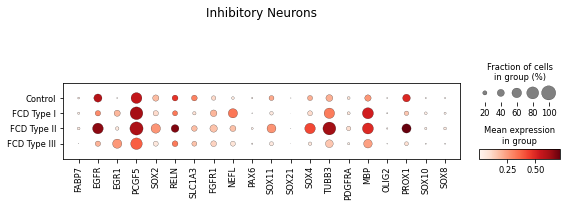

In [147]:
# remove MAP2
stem_markers_InN = ['FABP7', 'EGFR', 'EGR1', 'PCGF5', 'SOX2',
                 'RELN', 'SLC1A3', 'FGFR1',
                 'NEFL', 'PAX6', 'SOX11', 'SOX21', 'SOX4',
                 'TUBB3', 'PDGFRA', 'MBP', 'OLIG2', 'PROX1', 'SOX10', 'SOX8']
dotplot_InN = sc.pl.dotplot(InN, stem_markers_InN, groupby='condition', title='Inhibitory Neurons', save='InN_stemmarkers2.png')

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


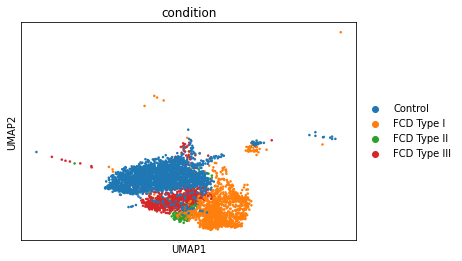

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:208: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


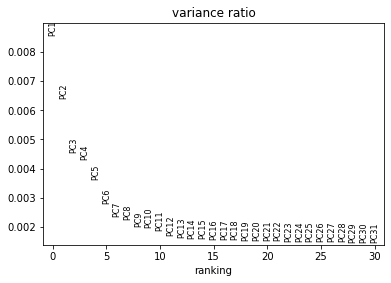

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


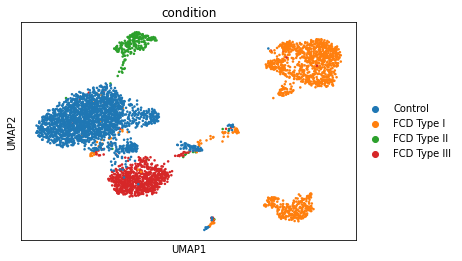

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


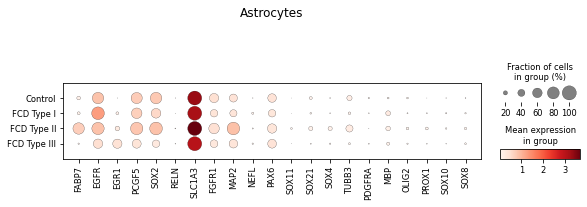

In [137]:
# Astrocytes, repeat analysis
Ast = adata[adata.obs["leiden"].isin(['4', '11', '13']),:]
sc.pl.umap(Ast, color=["condition"], show=True)
# identify variable genes
sc.pp.highly_variable_genes(Ast)
# PCA
sc.tl.pca(Ast)
sc.pl.pca_variance_ratio(Ast, n_pcs=30)
# computing the neighborhood graph and find clusters
sc.pp.neighbors(Ast, n_pcs=15)
sc.tl.leiden(Ast, resolution=0.4)
# run and plot UMAP
sc.tl.umap(Ast)
fig = sc.pl.umap(Ast, color=['condition'],
                legend_fontsize = 10)
# make dot plot
dotplot_Ast = sc.pl.dotplot(Ast, stem_markers, groupby='condition', title='Astrocytes', save='Ast_stemmarkers.png')

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


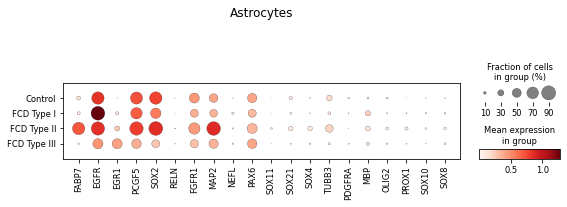

In [148]:
# remove SLC1A3 to see finer expression differences
stem_markers_Ast = ['FABP7', 'EGFR', 'EGR1', 'PCGF5', 'SOX2',
                 'RELN', 'FGFR1', 'MAP2',
                 'NEFL', 'PAX6', 'SOX11', 'SOX21', 'SOX4',
                 'TUBB3', 'PDGFRA', 'MBP', 'OLIG2', 'PROX1', 'SOX10', 'SOX8']
dotplot_Ast = sc.pl.dotplot(Ast, stem_markers_Ast, groupby='condition', title='Astrocytes', save='Ast_stemmarkers2.png')

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


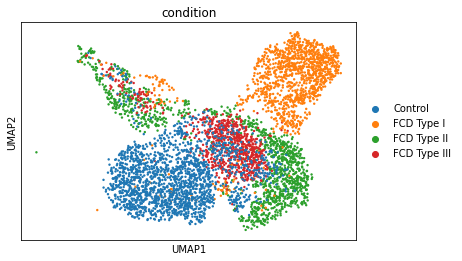

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


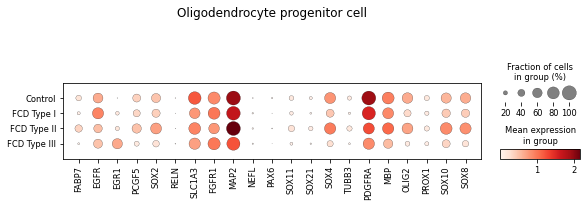

In [179]:
# OPCs, repeat analysis
OPCs = adata[adata.obs["leiden"].isin(['3', '7', '14', '20']),:]
#sc.pl.umap(OPCs, color=["condition"], show=True)
# identify variable genes
#sc.pp.highly_variable_genes(Ast)
# PCA
#sc.tl.pca(Ast)
#sc.pl.pca_variance_ratio(Ast, n_pcs=30)
# computing the neighborhood graph and find clusters
#sc.pp.neighbors(Ast, n_pcs=15)
#sc.tl.leiden(Ast, resolution=0.4)
# run and plot UMAP
sc.tl.umap(OPCs)
fig = sc.pl.umap(OPCs, color=['condition'],
                legend_fontsize = 10)
# make dot plot
dotplot_OPCs = sc.pl.dotplot(OPCs, stem_markers, groupby='condition', 
                             title='Oligodendrocyte progenitor cell', save='OPCs_stemmarkers.png')

In [168]:
sc.tl.rank_genes_groups(Ast, 'condition', method='wilcoxon', n_genes=200)
#sc.tl.filter_rank_genes_groups(Ast)
# for loop to compare each type to control?

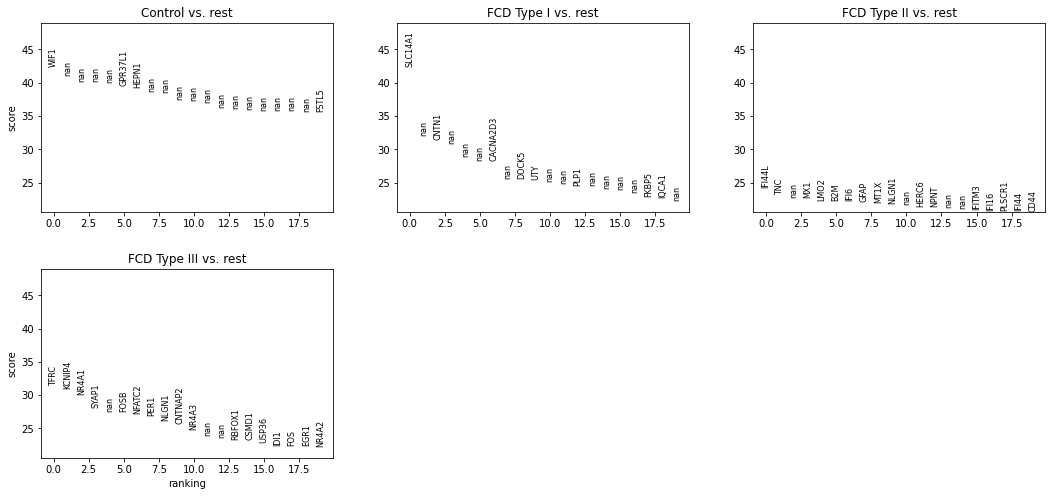

In [169]:
sc.pl.rank_genes_groups(Ast, key='rank_genes_groups_filtered', ncols=3)

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


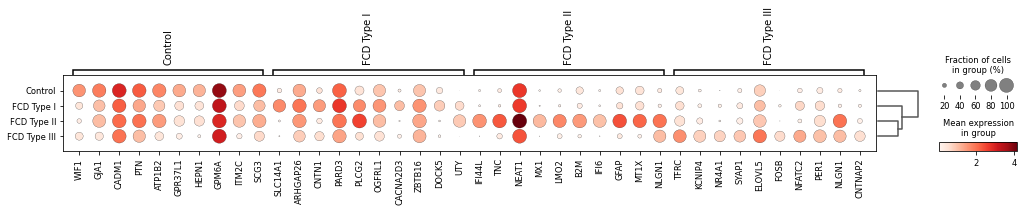

In [173]:
sc.pl.rank_genes_groups_dotplot(Ast, n_genes=10)

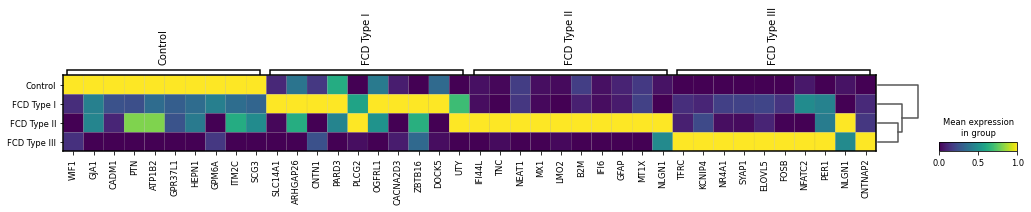

In [178]:
sc.pl.rank_genes_groups_matrixplot(Ast, n_genes=10, standard_scale="var", save='Ast_top_DEG.png')

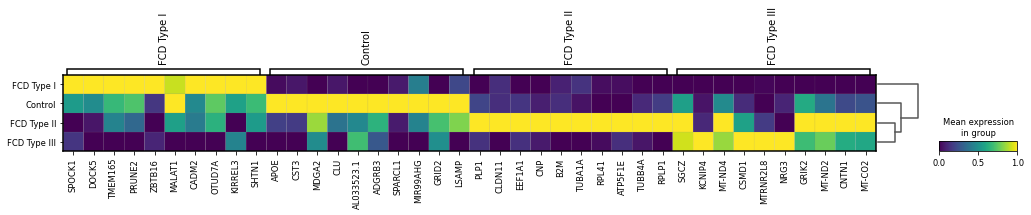

In [181]:
sc.tl.rank_genes_groups(OD, 'condition', method='wilcoxon', n_genes=200)
sc.pl.rank_genes_groups_matrixplot(OD, n_genes=10, standard_scale="var", save='OD_top_DEG.png')

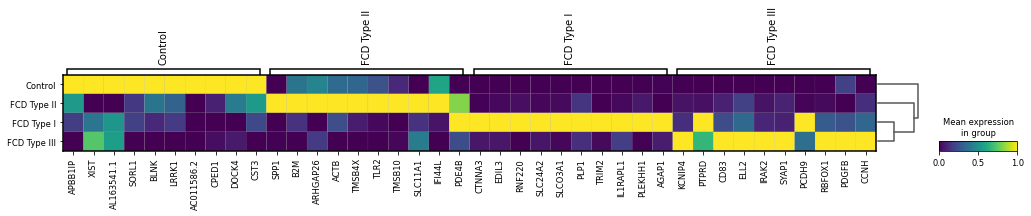

In [182]:
sc.tl.rank_genes_groups(MG, 'condition', method='wilcoxon', n_genes=200)
sc.pl.rank_genes_groups_matrixplot(MG, n_genes=10, standard_scale="var", save='MG_top_DEG.png')

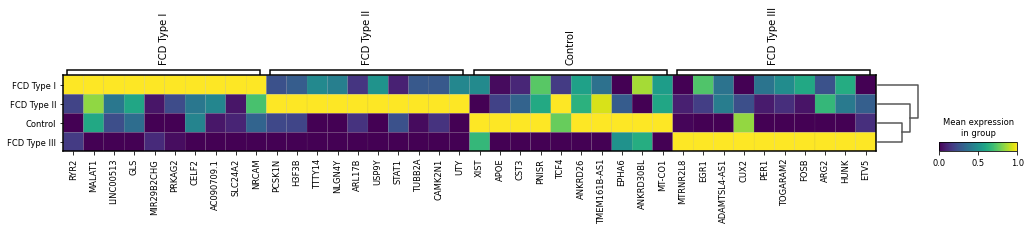

In [183]:
sc.tl.rank_genes_groups(InN, 'condition', method='wilcoxon', n_genes=200)
sc.pl.rank_genes_groups_matrixplot(InN, n_genes=10, standard_scale="var", save='InN_top_DEG.png')

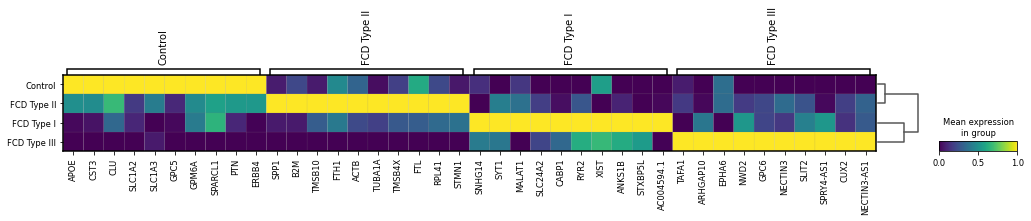

In [184]:
sc.tl.rank_genes_groups(ExN, 'condition', method='wilcoxon', n_genes=200)
sc.pl.rank_genes_groups_matrixplot(ExN, n_genes=10, standard_scale="var", save='ExN_top_DEG.png')

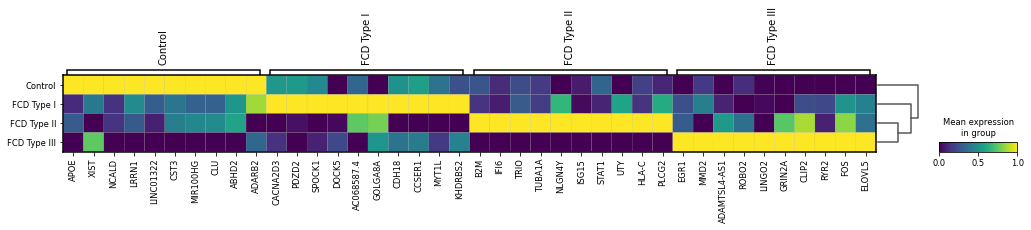

In [185]:
sc.tl.rank_genes_groups(OPCs, 'condition', method='wilcoxon', n_genes=200)
sc.pl.rank_genes_groups_matrixplot(OPCs, n_genes=10, standard_scale="var", save='OPCs_top_DEG.png')

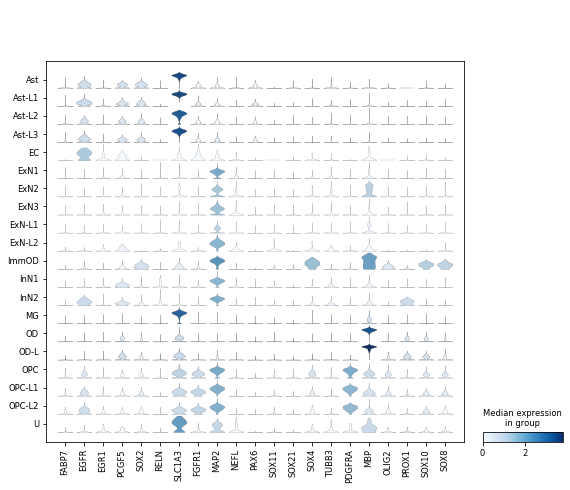

In [151]:
ax = sc.pl.stacked_violin(adata, stem_markers, groupby='cell_type_detail', swap_axes=False)

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


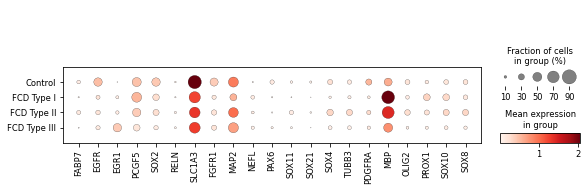

In [157]:
dotplot1 = sc.pl.dotplot(adata, stem_markers, groupby='condition', swap_axes=False, save='total1.png')

/Users/machome/miniconda3/envs/scRNA/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


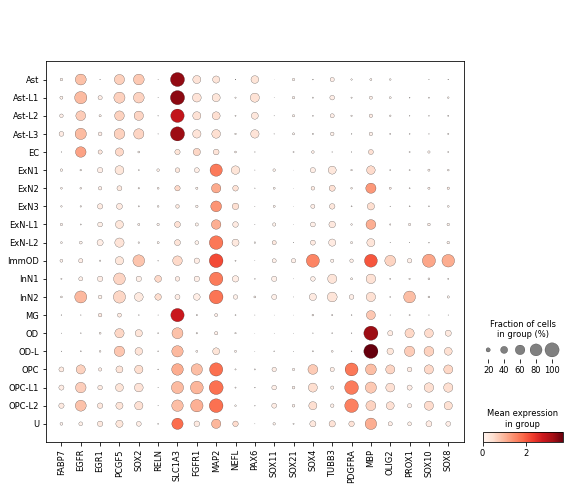

In [154]:
dotplot1 = sc.pl.dotplot(adata, stem_markers, groupby='cell_type_detail', save='total2.png')